# Choix des chiffres : 0 et 5

Prenom Nom : Leyth Akrout

In [154]:
from sklearn import datasets
import statistics as st
digits = datasets.load_digits()

On affiche une image :

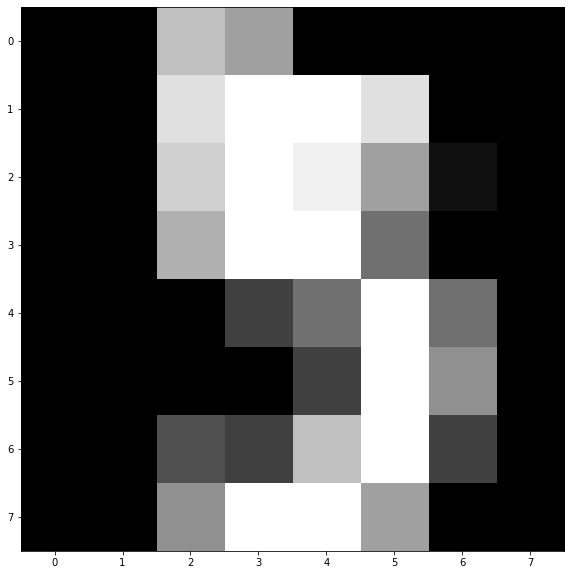

In [1180]:
import matplotlib.pyplot as plt
import numpy as np
from random import *
import random
random.seed(10)                                          #On fixe la graine psuedo-aléatoire
x10=digits.data[5,:]
x10=np.array(x10, dtype='uint8').reshape(8,8)            #On convertit le vecteur image en matrice image 
plt.imshow(x10, cmap="gray")

On isole les chiffres 0 et 5 dans **data0**, **data5** **label0** et **label5** :

In [86]:
v=[]
w=[]
p=0
k=0
for i in digits.target:
    if i==0:                 #On cree une liste d'emplacement pour les 0
        v.append(p)
    elif i==5:               #On cree une liste d'emplacement pour les 5
        w.append(p)
    p=p+1
data0=digits.data[v,:]
label0=digits.target[v]
data5=digits.data[w,:]
label5=digits.target[w]

On melange les donnees et les labels :

In [87]:
data=np.concatenate((data0,data5))
label=np.concatenate((label0,label5))
l=np.linspace(0,359,360)
l=list(l)
tirage = sample(l, 360)             #On tire au hasard sans remise les indices d'images
i=0
while i<len(tirage):                 #On convertit notre tirage en entier ( car reel au depart )  
    tirage[i]=int(tirage[i])
    i=i+1
data_mel=data[tirage,:]
label_mel=label[tirage]

On cree les donnees d'entrainement et de test notees **data_train**, **label_train**, **data_test** et **label_test** :

In [308]:
data=np.concatenate((data0,data5))
label=np.concatenate((label0,label5))
l1=np.linspace(0,359,360)
l1=list(l1)
tirage1 = sample(l1, 240)             #On tire au hasard sans remise 2/3 d'indices d'images
ntirage=[]
p=0
for i in l:                         #On cree le complementaire du tirage 
    if i not in tirage1:
        ntirage.append(p)
    p=p+1
i=0
while i<len(tirage1):                 #On convertit notre tirage en entier ( car reel au depart )  
    tirage1[i]=int(tirage1[i])
    i=i+1
i=0
while i<len(ntirage):
    ntirage[i]=int(ntirage[i])      #On convertit le complementaire de notre tirage en entier
    i=i+1
random.shuffle(ntirage)
data_train=data[tirage1,:]
data_test=data[ntirage,:]
label_train=label[tirage1]
label_test=label[ntirage]

# Classe Principale :

On commence par faire creer une classe de modele nomee **model** contenant les méthodes suivantes :  
-**metrique** cela permet d'afficher les principaux indicateurs pour un modele fixe.  
-**k_metrique** qui est un K-fold permettant de visualiser plus précisement les memes indicateurs.  
-**k_acc** qui fait un K-fold et qui affiche le vecteur d'accuracy obtenue.  
-**k_comp** qui permet de comparer pour un indicateur donnee differentes méthodes à l'aide d'un K-fold.

Train Accuracy : 1.0
Test Accuracy : 0.9833333333333333
Train Recall : 1.0
Test Recall : 0.96875
Train AUC : 1.0
Test AUC : 0.984375
Train Precision : 1.0
Test Precision : 1.0
Train F1 : 1.0
Test F1 : 0.9841269841269841


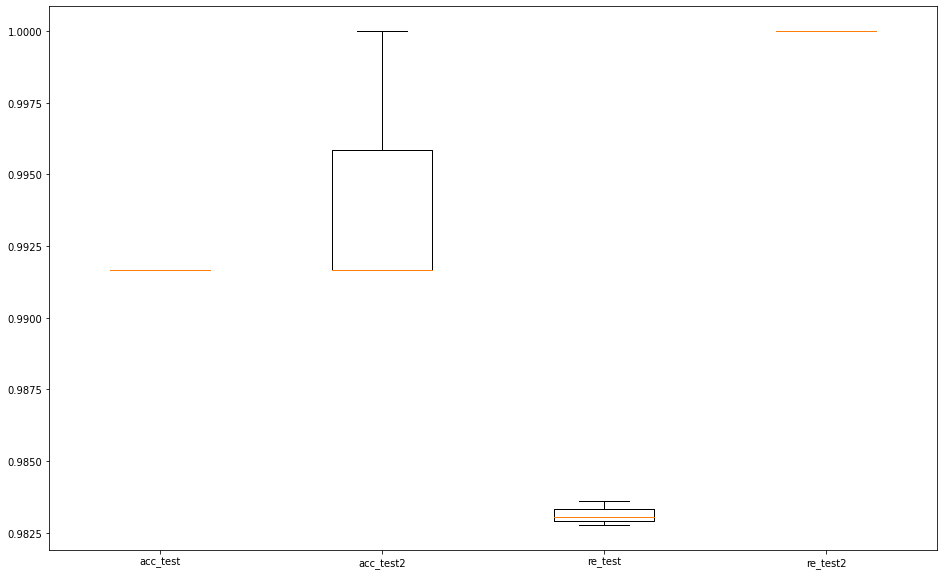

In [790]:
from sklearn.naive_bayes import GaussianNB as nb 
from sklearn import metrics
from sklearn.model_selection import KFold
from matplotlib import rcParams
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

class model:
    
    def __init__(self, model,model2=None):
        self.model=model
        self.model2=model2
        
    def metrique(self,data_train,label_train,data_test,label_test):
        fit=self.model.fit(data_train, label_train)
        prediction_train = fit.predict(data_train)
        prediction_test = fit.predict(data_test)
        print("Train Accuracy :",metrics.accuracy_score(label_train, prediction_train))
        print("Test Accuracy :",metrics.accuracy_score(label_test, prediction_test))
        print("Train Recall :", metrics.recall_score(label_train, prediction_train,pos_label=0))
        print("Test Recall :", metrics.recall_score(label_test, prediction_test,pos_label=0))
        print("Train AUC :", metrics.roc_auc_score(label_train, prediction_train))
        print("Test AUC :", metrics.roc_auc_score(label_test, prediction_test))
        print("Train Precision :", metrics.precision_score(label_train, prediction_train,pos_label=0))
        print("Test Precision :", metrics.precision_score(label_test, prediction_test,pos_label=0))
        print("Train F1 :", metrics.f1_score(label_train, prediction_train,pos_label=0))
        print("Test F1 :", metrics.f1_score(label_test, prediction_test,pos_label=0))
        
    def k_metrique(self,data,label,num_split,mel):
        kf = KFold(n_splits=num_split,shuffle=mel)
        acc_train=[]
        re_train=[]
        roc_train=[]
        pr_train=[]
        f1_train=[]
        acc_test=[]
        re_test=[]
        roc_test=[]
        pr_test=[]
        f1_test=[]
        for i,j in kf.split(data,label):
            data_train=data[i]
            label_train=label[i]
            data_test=data[j]
            label_test=label[j]
            fit = self.model.fit(data_train, label_train)
            prediction_train = fit.predict(data_train)
            prediction_test = fit.predict(data_test)
            acc_train.append(metrics.accuracy_score(label_train, prediction_train))
            re_train.append(metrics.recall_score(label_train, prediction_train,pos_label=0))
            roc_train.append(metrics.roc_auc_score(label_train, prediction_train))
            pr_train.append(metrics.precision_score(label_train, prediction_train,pos_label=0))
            f1_train.append(metrics.f1_score(label_train, prediction_train,pos_label=0))
            acc_test.append(metrics.accuracy_score(label_test, prediction_test))
            re_test.append(metrics.recall_score(label_test, prediction_test,pos_label=0))
            roc_test.append(metrics.accuracy_score(label_test, prediction_test))
            pr_test.append(metrics.precision_score(label_test, prediction_test,pos_label=0))
            f1_test.append(metrics.f1_score(label_train, prediction_train,pos_label=0))
        rcParams['figure.figsize'] = 35,10
        plt.subplot(121)
        plt.boxplot([acc_train,acc_test, re_train,re_test, roc_train,roc_test,pr_train,pr_test,f1_train,f1_test])
        plt.xticks([1,2,3,4,5,6,7,8,9,10],["acc_train","acc_test", "re_train","re_test", "roc_train","roc_test","pr_train","pr_test","f1_train","f1_test"])
        
    def k_acc(self,data,label,num_split,mel):
        kf = KFold(n_splits=num_split,shuffle=mel)
        acc_train=[]
        acc_test=[]
        for i,j in kf.split(data,label):
            data_train=data[i]
            label_train=label[i]
            data_test=data[j]
            label_test=label[j]
            fit=self.model.fit(data_train, label_train)
            prediction_test = fit.predict(data_test)
            acc_test.append(metrics.accuracy_score(label_test, prediction_test))
        return acc_test
    
    def k_comp(self,data,label,num_split,mel,acc=True,re=False,roc=False,pr=False,f1=False,train=True):
        kf = KFold(n_splits=num_split,shuffle=mel)
        acc_train=[]
        re_train=[]
        roc_train=[]
        pr_train=[]
        f1_train=[]
        acc_test=[]
        re_test=[]
        roc_test=[]
        pr_test=[]
        f1_test=[]
        acc_train2=[]
        re_train2=[]
        roc_train2=[]
        pr_train2=[]
        f1_train2=[]
        acc_test2=[]
        re_test2=[]
        roc_test2=[]
        pr_test2=[]
        f1_test2=[]
        for i,j in kf.split(data,label):
            data_train=data[i]
            label_train=label[i]
            data_test=data[j]
            label_test=label[j]
            fit = self.model.fit(data_train, label_train)
            prediction_train = fit.predict(data_train)
            prediction_test = fit.predict(data_test)
            fit2 = self.model2.fit(data_train, label_train)
            prediction_train2 = fit2.predict(data_train)
            prediction_test2 = fit2.predict(data_test)
            acc_train.append(metrics.accuracy_score(label_train, prediction_train))
            re_train.append(metrics.recall_score(label_train, prediction_train,pos_label=0))
            roc_train.append(metrics.roc_auc_score(label_train, prediction_train))
            pr_train.append(metrics.precision_score(label_train, prediction_train,pos_label=0))
            f1_train.append(metrics.f1_score(label_train, prediction_train,pos_label=0))
            acc_test.append(metrics.accuracy_score(label_test, prediction_test))
            re_test.append(metrics.recall_score(label_test, prediction_test,pos_label=0))
            roc_test.append(metrics.accuracy_score(label_test, prediction_test))
            pr_test.append(metrics.precision_score(label_test, prediction_test,pos_label=0))
            f1_test.append(metrics.f1_score(label_train, prediction_train,pos_label=0))
            acc_train2.append(metrics.accuracy_score(label_train, prediction_train2))
            re_train2.append(metrics.recall_score(label_train, prediction_train2,pos_label=0))
            roc_train2.append(metrics.roc_auc_score(label_train, prediction_train2))
            pr_train2.append(metrics.precision_score(label_train, prediction_train2,pos_label=0))
            f1_train2.append(metrics.f1_score(label_train, prediction_train2,pos_label=0))
            acc_test2.append(metrics.accuracy_score(label_test, prediction_test2))
            re_test2.append(metrics.recall_score(label_test, prediction_test2,pos_label=0))
            roc_test2.append(metrics.accuracy_score(label_test, prediction_test2))
            pr_test2.append(metrics.precision_score(label_test, prediction_test2,pos_label=0))
            f1_test2.append(metrics.f1_score(label_train, prediction_train2,pos_label=0))
        ind=[acc,re,roc,pr,f1,]
        indicateurs=[acc_train,acc_train2, re_train,re_train2, roc_train,roc_train2,pr_train,pr_train2,f1_train,f1_train2,acc_test,acc_test2, re_test,re_test2, roc_test,roc_test2,pr_test,pr_test2,f1_test,f1_test2]
        indicateursl=["acc_train","acc_train2", "re_train","re_train2", "roc_train","roc_train2","pr_train","pr_train2","f1_train","f1_train2","acc_test","acc_test2", "re_test","re_test2", "roc_test","roc_test2","pr_test","pr_test2","f1_test","f1_test2"]
        i2=0
        j2=0
        indicateurs2=[]
        indicateursl2=[]
        j2=0
        while i2<5:
            if (ind[i2]==True and train==True):
                indicateurs2.append(indicateurs[2*i2])
                indicateurs2.append(indicateurs[2*i2+1])
                indicateurs2.append(indicateurs[2*i2+10])
                indicateurs2.append(indicateurs[2*i2+11])
                indicateursl2.append(indicateursl[2*i2])
                indicateursl2.append(indicateursl[2*i2+1])
                indicateursl2.append(indicateursl[2*i2+10])
                indicateursl2.append(indicateursl[2*i2+11])
                j2=j2+4
            elif (ind[i2]==True and train==False):
                indicateurs2.append(indicateurs[2*i2+10])
                indicateurs2.append(indicateurs[2*i2+11])
                indicateursl2.append(indicateursl[2*i2+10])
                indicateursl2.append(indicateursl[2*i2+11])
                j2=j2+2
            i2=i2+1
            
        rcParams['figure.figsize'] = 35,10
        plt.subplot(121)
        plt.boxplot(indicateurs2)
        plt.xticks(np.linspace(1,j2,j2),indicateursl2)

mod=nb()  
mod2=LinearDiscriminantAnalysis()
m=model(mod,model2=mod2)
m.metrique(data_train,label_train,data_test,label_test)
m.k_metrique(data_mel,label_mel,3,True)
m.k_acc(data_mel,label_mel,3,True)
plt.clf()
m.k_comp(data_mel,label_mel,3,mel=True,train=False,re=True)

# Bayes Naif :

On commence par un modele de Bayes Naif avec la methode **metrique** :

In [755]:
from sklearn.naive_bayes import GaussianNB as nb 

mod_nb=nb()  
m_nb=model(mod_nb)
m_nb.metrique(data_train,label_train,data_test,label_test)

Train Accuracy : 1.0
Test Accuracy : 0.9833333333333333
Train Recall : 1.0
Test Recall : 0.96875
Train AUC : 1.0
Test AUC : 0.984375
Train Precision : 1.0
Test Precision : 1.0
Train F1 : 1.0
Test F1 : 0.9841269841269841


On fait un K-fold ( a l'aide de la methode **k_metrique** ) pour le modele naive bayes et on compare les indicateurs **Accuracy**, **Recall**, **Precision**, **AUC**   
et **F1** :  

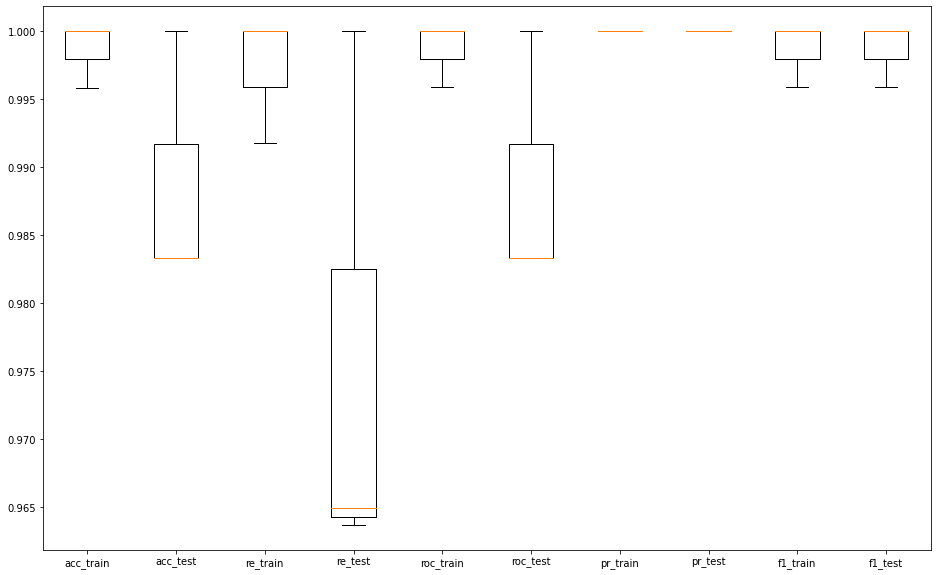

In [763]:
m_nb.k_metrique(data_mel,label_mel,3,True) #Ici le True précise que nous melengeons a nouveau nos donnees de departs
                                        #ce qui permet d'estimer la variabilite du modele choisit.

On remarque ici ( en iterant plusieurs fois le code si dessus ) que le modele de Bayes Naif à l'avantage de ne pas avoir une variance trop elevee par contre nous verrons plus tard que cette methode est biaise.  
Justifions la premiere affirmation en calculant la variance de l'indicateur accuracy a l'aide de la methode **k_acc** :

In [806]:
compte=0
acc=[]
while compte<100:
    acc.append(st.mean(m_nb.k_acc(data_mel,label_mel,3,True)))
    compte=compte+1
print("Bayes Naif Variance accuracy =" ,st.variance(acc))

Bayes Naif Variance accuracy = 1.2919316623020421e-05


# LDA :

On refait le meme travail que pour le modele precedent :

In [765]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

mod_lda=LinearDiscriminantAnalysis()
m_lda=model(mod_lda)
m_lda.metrique(data_train,label_train,data_test,label_test)

Train Accuracy : 1.0
Test Accuracy : 1.0
Train Recall : 1.0
Test Recall : 1.0
Train AUC : 1.0
Test AUC : 1.0
Train Precision : 1.0
Test Precision : 1.0
Train F1 : 1.0
Test F1 : 1.0


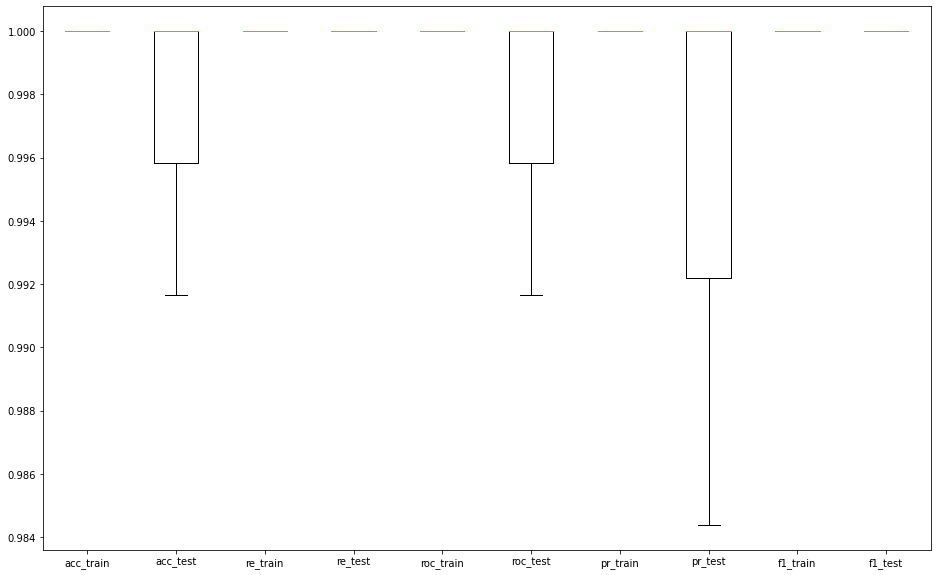

In [766]:
m_lda.k_metrique(data_mel,label_mel,3,True)

In [805]:
compte=0
acc=[]
while compte<100:
    acc.append(st.mean(m_lda.k_acc(data_mel,label_mel,3,True)))
    compte=compte+1
print("LDA Variance accuracy =" ,st.variance(acc))

LDA Variance accuracy = 2.179199401421608e-06


On remarque ici que la variance du modele LDA est plus faible que celle du modele Naive Bayes, on aurai donc deja tendence a preferer LDA.  
Comparons maintenant leur resultats a l'aide de la methode **k_comp**.

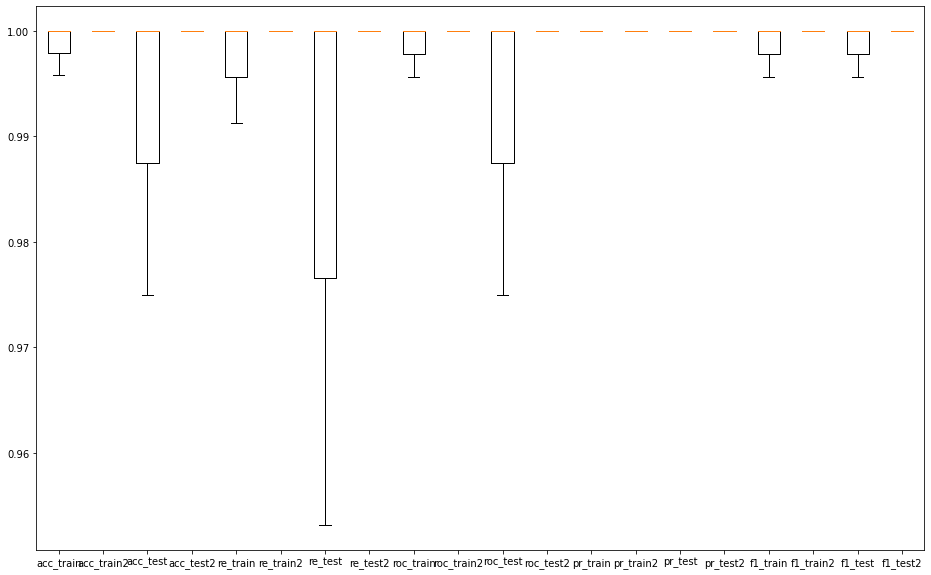

In [792]:
m_nb_lda=model(mod_nb,model2=mod_lda)
m.k_comp(data_mel,label_mel,3,mel=True,re=True,f1=True,pr=True,roc=True)

Interessons nous uniquement au donnee de test pour y voir un peu plus clair :

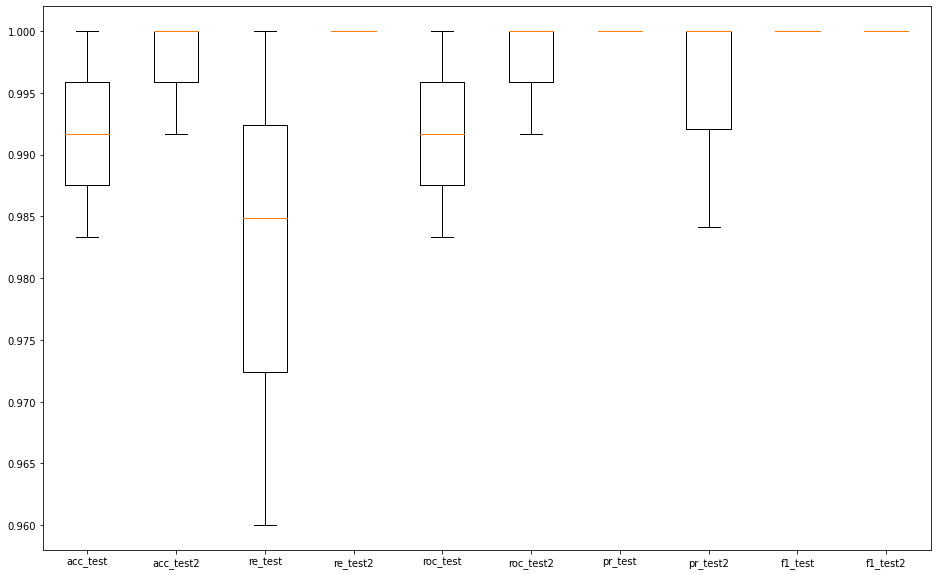

In [802]:
m.k_comp(data_mel,label_mel,3,mel=True,re=True,f1=True,pr=True,roc=True,train=False)

Au vu des resultats precedents il serait plus interessant d'utiliser le modele LDA plutot que le modele de Bayes Naif, en effet il a une variance plus faible et presente de meilleure resultats sur tout les indicateurs exepte sur la precision. Comme ici on ne penalise pas plus les faux negatif que les faux positifs le chiffre 0 n'etant pas plus important a priori que le chiffre 5 et inversement un indicateur "suffisant" est l'accuracy. 

# QDA :

In [803]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

mod_qda=QuadraticDiscriminantAnalysis()
m_qda=model(mod_qda)
m_qda.metrique(data_train,label_train,data_test,label_test)

Train Accuracy : 1.0
Test Accuracy : 0.9833333333333333
Train Recall : 1.0
Test Recall : 0.96875
Train AUC : 1.0
Test AUC : 0.984375
Train Precision : 1.0
Test Precision : 1.0
Train F1 : 1.0
Test F1 : 0.9841269841269841


/home/lakrout/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


/home/lakrout/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/lakrout/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/lakrout/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


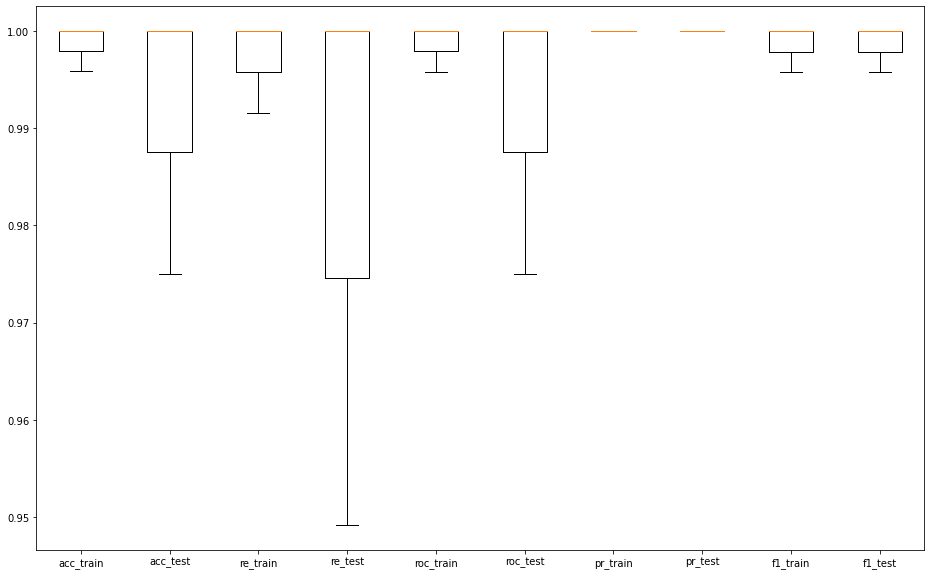

In [839]:
m_qda.k_metrique(data_mel,label_mel,3,True)

In [819]:
compte=0
acc=[]
while compte<10:
    acc.append(st.mean(m_qda.k_acc(data_mel,label_mel,3,True)))
    compte=compte+1
print("QDA Variance accuracy =" ,st.variance(acc))

/home/lakrout/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/lakrout/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/lakrout/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/lakrout/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/lakrout/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/lakrout/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear"

QDA Variance accuracy = 0.00026714677640603615


/home/lakrout/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/lakrout/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/lakrout/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/lakrout/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/lakrout/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/lakrout/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear"

QDA Variance accuracy = 0.00041 ce qui est superieur a la variance accuracy de LDA. Comparons maintenant les indicateurs des modeles LDA et QDA en regardant directement les donnees test :

/home/lakrout/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/lakrout/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/lakrout/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


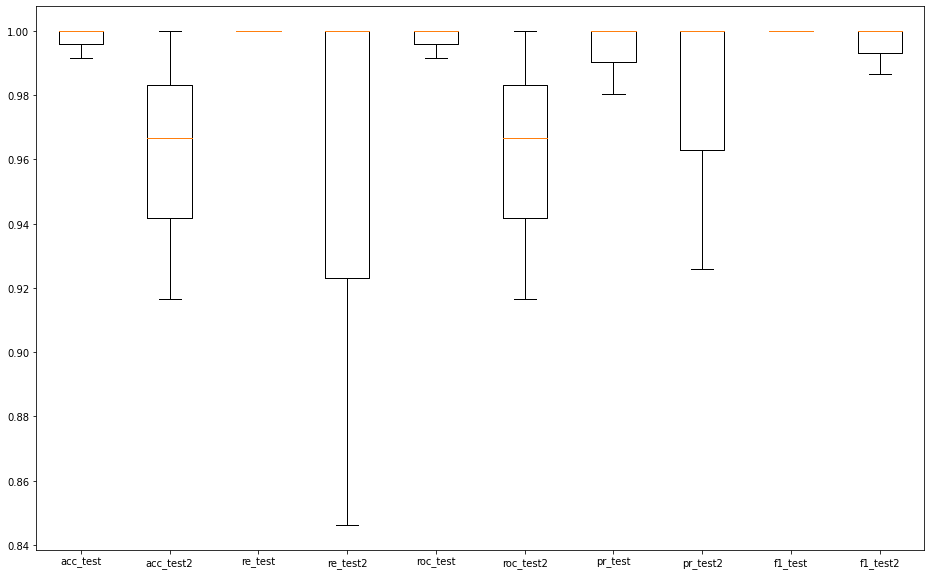

In [840]:
m_lda_qda=model(mod_lda,model2=mod_qda)
m_lda_qda.k_comp(data_mel,label_mel,3,mel=True,re=True,f1=True,pr=True,roc=True, train=False)

On remarque ici que le modele QDA reussi moins correctement a predire le bon chiffre que la modele LDA. 

# Regression Logistique :

On fait un modele naif avec C=1 que l'on déterminera plus précisément par la suite : 

In [842]:
from sklearn.linear_model import LogisticRegression

mod_lreg=LogisticRegression()
m_lreg=model(mod_lreg)
m_lreg.metrique(data_train,label_train,data_test,label_test)

Train Accuracy : 1.0
Test Accuracy : 1.0
Train Recall : 1.0
Test Recall : 1.0
Train AUC : 1.0
Test AUC : 1.0
Train Precision : 1.0
Test Precision : 1.0
Train F1 : 1.0
Test F1 : 1.0


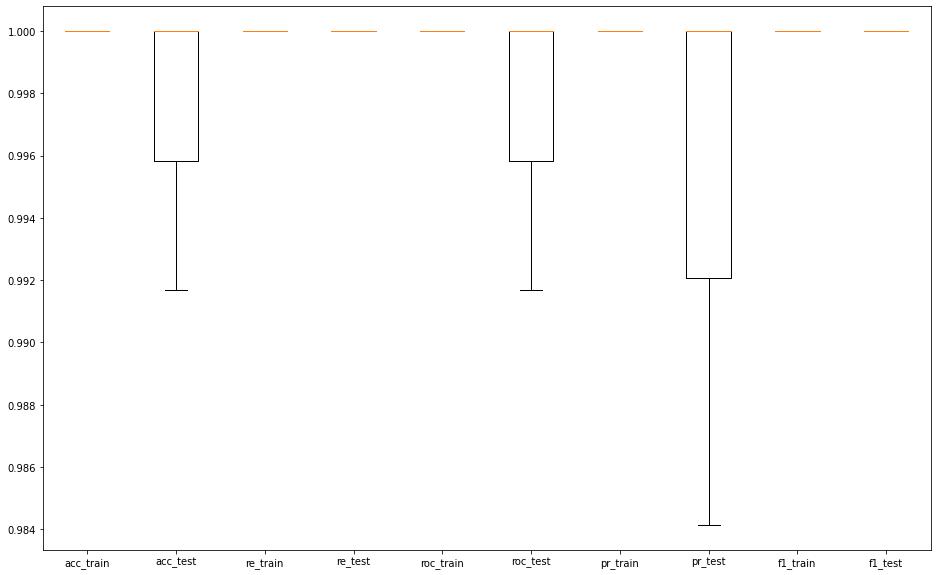

In [847]:
m_lreg.k_metrique(data_mel,label_mel,3,True)

In [849]:
compte=0
acc=[]
while compte<100:
    acc.append(st.mean(m_lreg.k_acc(data_mel,label_mel,3,True)))
    compte=compte+1
print("Log-Reg Variance accuracy =" ,st.variance(acc))

Log-Reg Variance accuracy = 7.716049382715994e-08


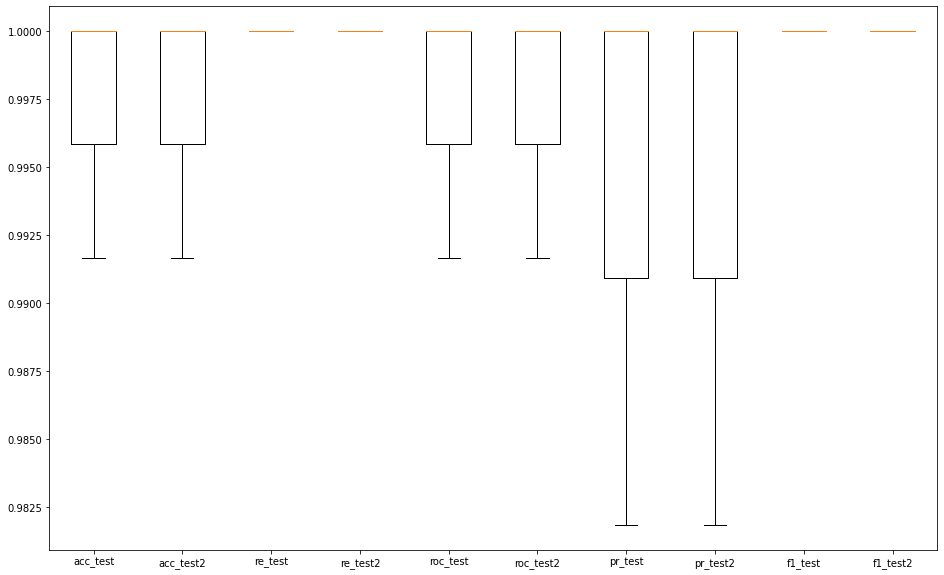

In [859]:
m_lda_lreg=model(mod_lda,model2=mod_lreg)
m_lda_lreg.k_comp(data_mel,label_mel,3,mel=True,re=True,f1=True,pr=True,roc=True, train=False)

On essaye de determiner C pour voir si on peux ameliorer les performances de cette classification logistique : 

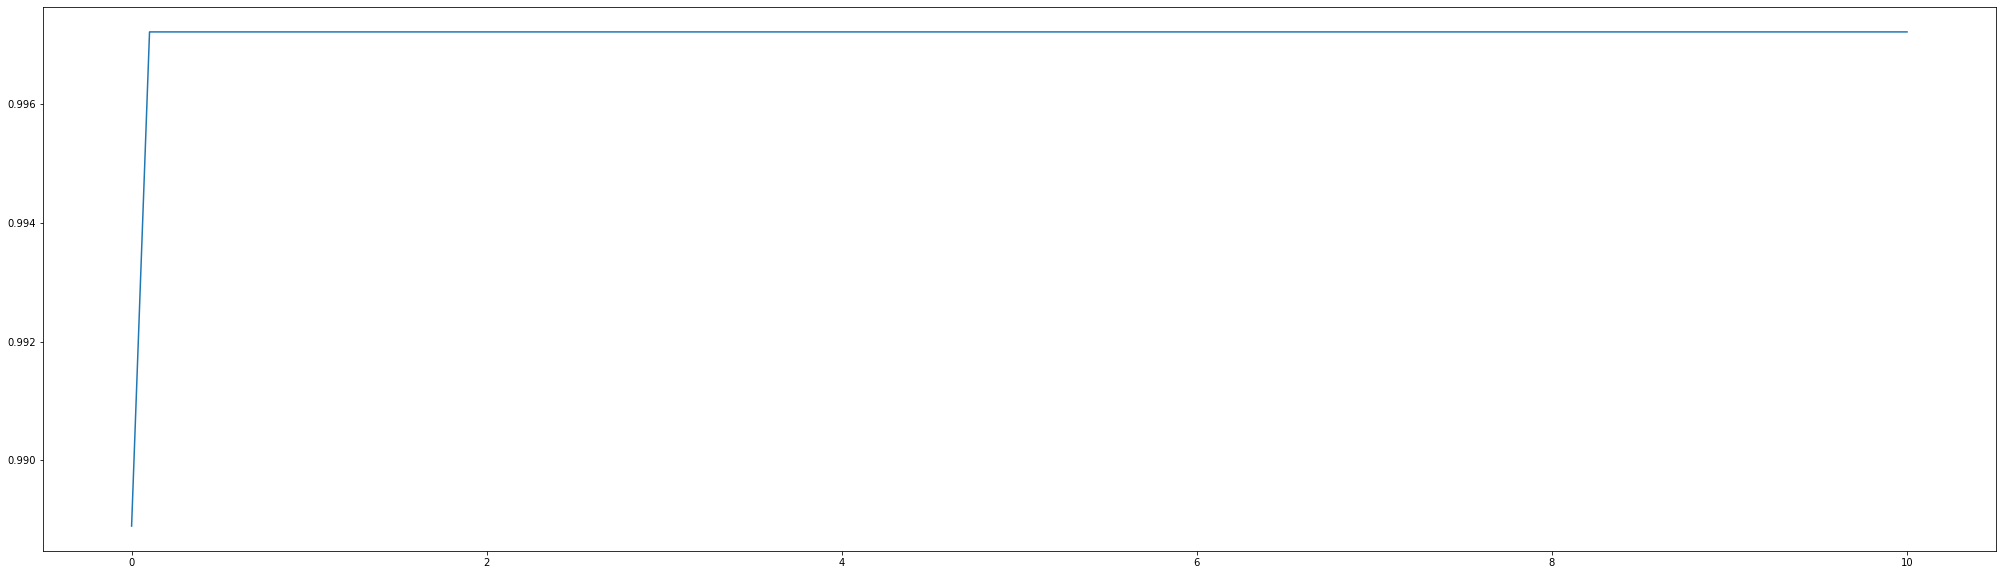

In [851]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from matplotlib import rcParams

def k_rl2_metrics(data,label,num_split,mel,c):
    kf = KFold(n_splits=num_split,shuffle=mel)
    acc_train=[]
    re_train=[]
    roc_train=[]
    pr_train=[]
    f1_train=[]
    acc_test=[]
    re_test=[]
    roc_test=[]
    pr_test=[]
    f1_test=[]
    for i,j in kf.split(data,label):
        data_train=data[i]
        label_train=label[i]
        data_test=data[j]
        label_test=label[j]
        rl = LogisticRegression(C=c);
        rlfit=rl.fit(data_train, label_train)
        prediction_test = rlfit.predict(data_test)
        acc_test.append(metrics.accuracy_score(label_test, prediction_test))
    return st.mean(acc_test)

u=np.linspace(10**(-5),10,100)
i=0
a=np.array([])
while i<len(u):
    a=np.append(a,k_rl2_metrics(data_mel,label_mel,3,False,c=float(u[i])))
    i=i+1
plt.plot(u,a)

On remarque qu'ici C=1 est le mieux adapté à notre problème car la fonction de l'indicateur accuracy dependent de C atteint son maximum en C=1.  
La comparaison entre LogReg et LDA reste donc valable. On remarque que les deux methodes ont des resultats tres semblables, un argument pour faire un choix serai par exemple de priviligier la methode la plus rapide.  
En restant uniquement sur cet argument il faudrait privilegier le modele LDA.

# KNN : 

On va essayer de determiner K. Pour ce faire on dessine des diagrames qui correspondent a l'indicateur accuracy selon differentes valeurs de K :

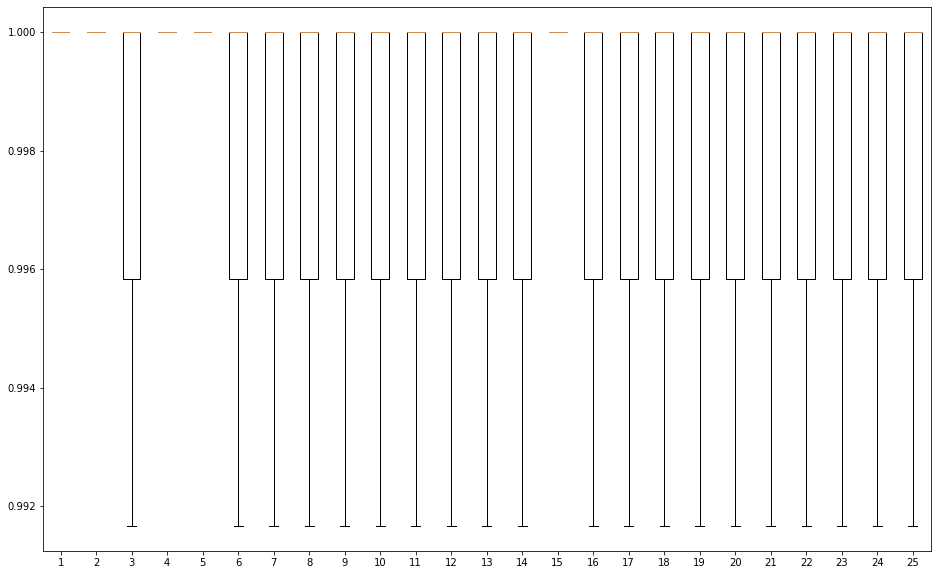

In [875]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import KFold
from matplotlib import rcParams

def k_knn_metrics(data,label,num_split,mel,K):
    kf = KFold(n_splits=num_split,shuffle=mel)
    acc_train=[]
    re_train=[]
    roc_train=[]
    pr_train=[]
    f1_train=[]
    acc_test=[]
    re_test=[]
    roc_test=[]
    pr_test=[]
    f1_test=[]
    for i,j in kf.split(data,label):
        data_train=data[i]
        label_train=label[i]
        data_test=data[j]
        label_test=label[j]
        knn = KNeighborsClassifier(n_neighbors=K);
        knnfit=knn.fit(data_train, label_train)
        prediction_test = knnfit.predict(data_test)
        acc_test.append(metrics.accuracy_score(label_test, prediction_test))
    return acc_test

i=np.linspace(1,25,25)           #ici on choisit de prendre K qui va de 1 a 25
a=np.zeros((3,len(i)))
j=0
while j<len(i):
    a[:,j]=k_knn_metrics(data_mel,label_mel,3,True,int(i[j]))
    j=j+1
plt.subplot(211)
rcParams['figure.figsize'] = 35,10
plt.subplot(121)
plt.boxplot(a)
plt.xticks(i)
j=j

On voit qu'en repetant le code precedent que le meilleurs choix semble etre K=1 essayons de confirmer cela en comptant le nombres de fois ou cet indicateur n'est pas identiquement egal a 1 : 

In [895]:
comp2=0
compte2=0
while comp2<1000:
    if st.mean(k_knn_metrics(data_mel,label_mel,3,True,1))<1:
        compte2=compte2+1
    comp2=comp2+1
print("Pour K=1 cet indicateur n'est pas identiquement egal a 1 dans", compte2/10,"% des cas." )
comp2=0
compte2=0
while comp2<1000:
    if st.mean(k_knn_metrics(data_mel,label_mel,3,True,2))<1:
        compte2=compte2+1
    comp2=comp2+1
print("A titre de comparaison pour K=2 cet indicateur n'est pas identiquement egal a 1 dans", compte2/10,"% des cas." )

Pour K=1 cet indicateur n'est pas identiquement egal a 1 dans 1.0 % des cas.
A titre de comparaison pour K=2 cet indicateur n'est pas identiquement egal a 1 dans 11.8 % des cas.


On choisit donc K=1 et on compare KNN a LDA :

In [911]:
mod_knn=KNeighborsClassifier()
m_knn=model(mod_knn)
compte=0
acc=[]
while compte<100:
    acc.append(st.mean(m_knn.k_acc(data_mel,label_mel,3,True)))
    compte=compte+1
print("KNN Variance accuracy =" ,st.variance(acc))

KNN Variance accuracy = 1.099731886768916e-06


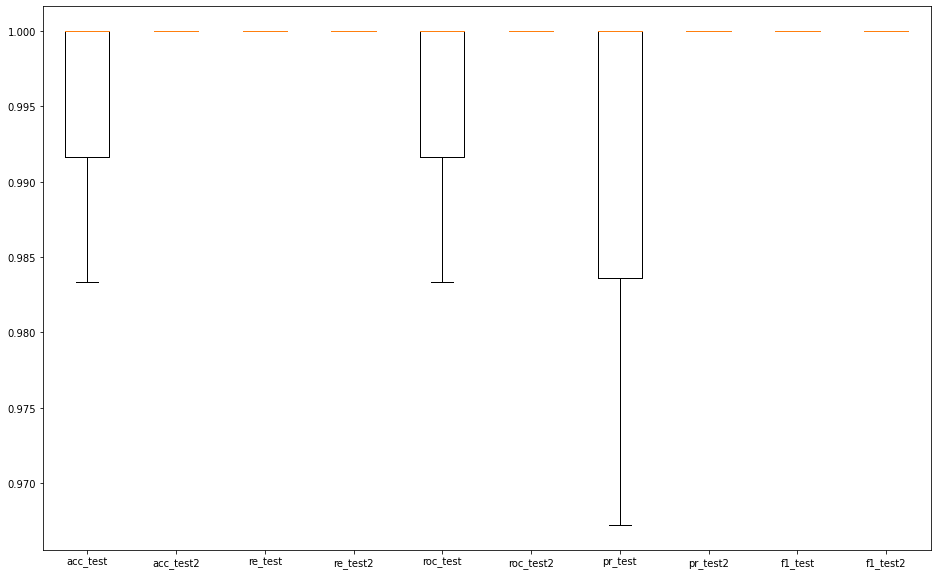

In [910]:
from sklearn.neighbors import KNeighborsClassifier

mod_knn=KNeighborsClassifier()
m_knn=model(mod_knn)
m_lda_knn=model(mod_lda,model2=mod_knn)
m_lda_knn.k_comp(data_mel,label_mel,3,mel=True,re=True,f1=True,pr=True,roc=True, train=False)  

On voit ici que KNN et LDA ont une variance de l'indicateur accuracy a peu pres identique par contre KNN reussi mieux a distiguer et a classer les chiffres. Il serait il me semble judicieux de choisir ici KNN.

## Arbres :

On veux montrer que le choix d'un arbre simple n'est pas facile et adapte au probleme ici, pour ce faire on montre l'instablilité de ces arbres quand l'on fait varier quelques parametres : 

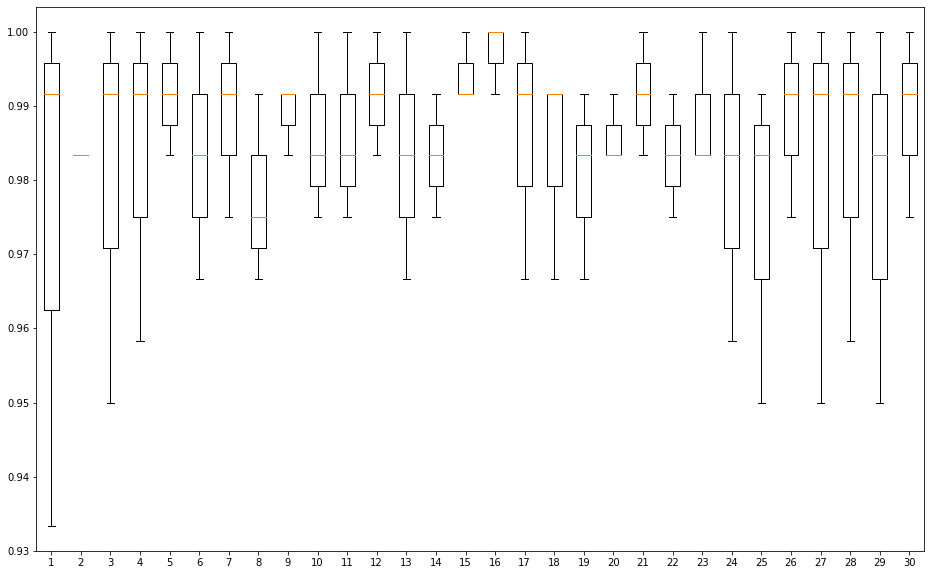

In [588]:
from sklearn.tree import DecisionTreeClassifier
?DecisionTreeClassifier
i=np.linspace(1,30,30)
a=np.zeros((3,len(i)))
j=0
while j<len(i):
    mod=DecisionTreeClassifier(min_samples_split=int(i[j])+1) #on fait varier de 1 à 30 le parametre min_samples_split
    m=model(mod)
    a[:,j]=m.k_acc(data_mel,label_mel,3,True) 
    j=j+1
plt.subplot(211)
rcParams['figure.figsize'] = 35,10
plt.subplot(121)
plt.boxplot(a)
plt.xticks(i)
j=j

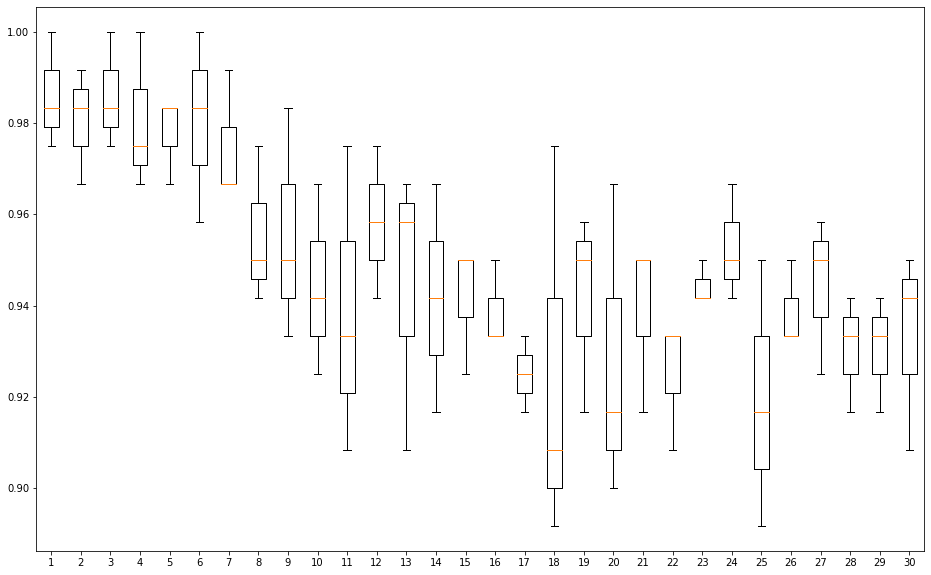

In [584]:
from sklearn.tree import DecisionTreeClassifier

i=np.linspace(1,30,30)
a=np.zeros((3,len(i)))
j=0
while j<len(i):
    mod=DecisionTreeClassifier(min_samples_leaf=int(i[j])+1) ##on fait varier de 1 à 30 le parametre min_samples_leaf
    m=model(mod)
    a[:,j]=m.k_acc(data_mel,label_mel,3,True)
    j=j+1
plt.subplot(211)
rcParams['figure.figsize'] = 35,10
plt.subplot(121)
plt.boxplot(a)
plt.xticks(i)
j=j

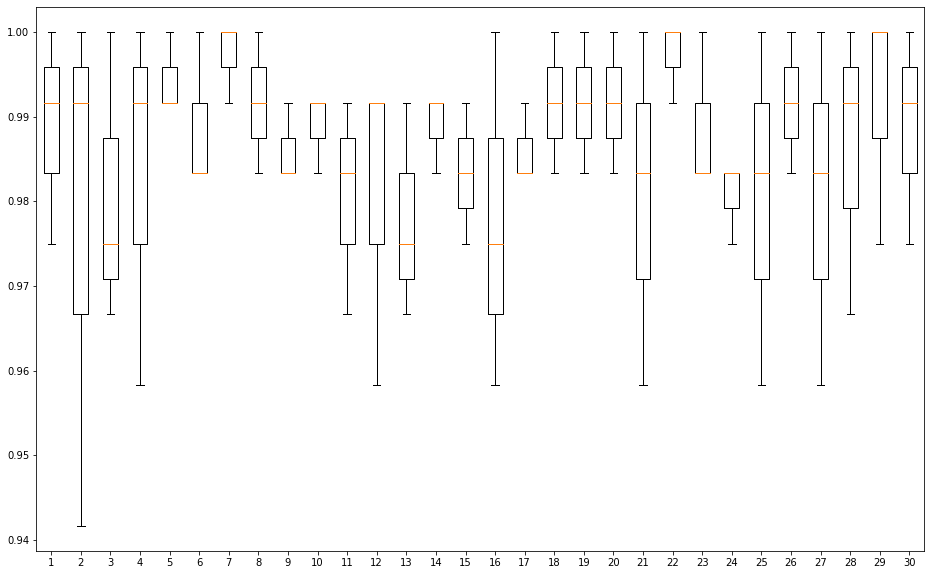

In [587]:
from sklearn.tree import DecisionTreeClassifier

i=np.linspace(1,30,30)
a=np.zeros((3,len(i)))
j=0
while j<len(i):
    mod=DecisionTreeClassifier(max_depth=int(i[j])+1) #on fait varier de 1 à 30 le parametre max_depth
    m=model(mod)
    a[:,j]=m.k_acc(data_mel,label_mel,3,True)
    j=j+1
plt.subplot(211)
rcParams['figure.figsize'] = 35,10
plt.subplot(121)
plt.boxplot(a)
plt.xticks(i)
j=j

On remarque que dans ces trois cas le choix du parametre est complexe, de plus quand l'on relance plusieurs fois ces parties du code on remarque une variabilité pour des memes parametres.
Pour contrer ce phénomenes de forte variance nous allons appliquer des techniques de types Bagging.
Pour sélectionner les parametres nous allons appliquer des techniques du types Boosting. 

# Bagging ~ Random Forest :

On va utiliser des arbres independant ( car on choisira aleatoirement certaines variables a chaque noeud ) avec un biais assez faible (car on prendra des arbres assez profond )
mais par consequent avec une variance elevee. On fera ensuite du bagging sur ces arbres pour faire baisser la variance et garder un biais faible.  
Il restera a determiner la profondeur maximale et le nombres d'arbres optimaux pour notre bagging.

In [1091]:
from sklearn.ensemble import RandomForestClassifier

mod_rf=RandomForestClassifier(n_estimators=100,max_depth=None)
m_rf=model(mod_rf)
m_rf.metrique(data_train,label_train,data_test,label_test)

Train Accuracy : 1.0
Test Accuracy : 1.0
Train Recall : 1.0
Test Recall : 1.0
Train AUC : 1.0
Test AUC : 1.0
Train Precision : 1.0
Test Precision : 1.0
Train F1 : 1.0
Test F1 : 1.0


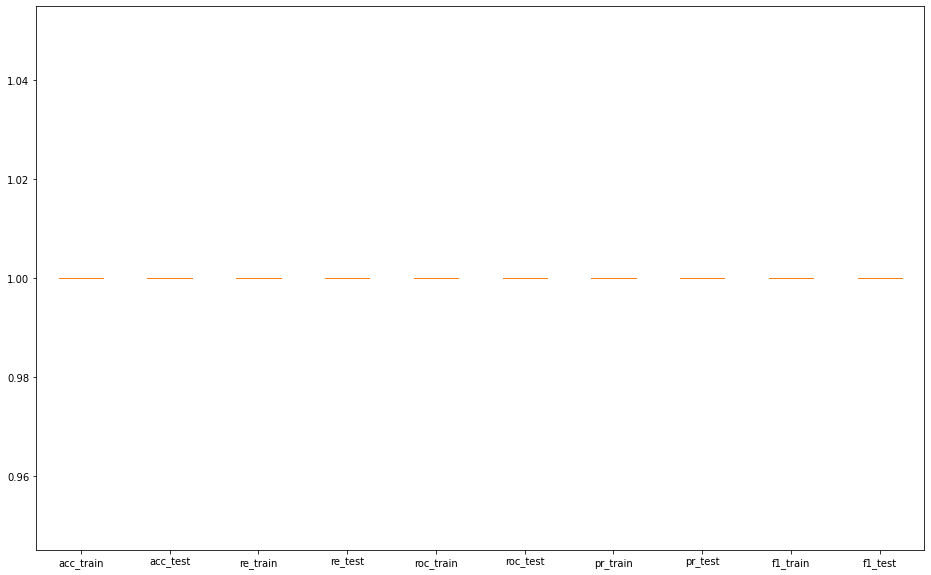

In [1090]:
m_rf.k_metrique(data_mel,label_mel,3,True)

On va dessiner ( pour n_estimators=100 ) les points de coordonnees (max_depth,accuracy) avec max_depth qui varie de 1 a 30 :  

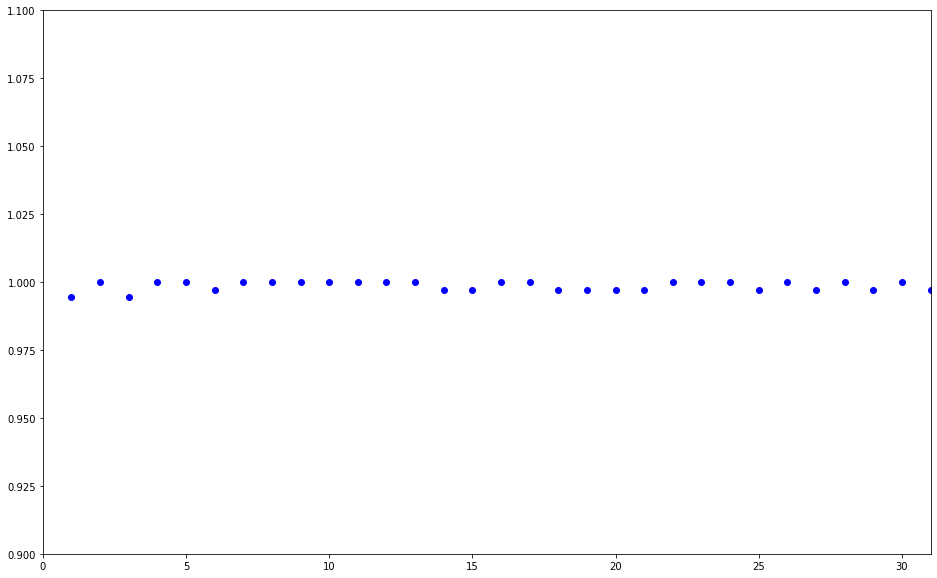

In [1109]:
i=1
plt.subplot(121)
plt.axis([0,31,0.9,1.1])
while i<40:
    mod_rf=RandomForestClassifier(n_estimators=100,max_depth=i)
    m_rf=model(mod_rf)
    p=st.mean(m_rf.k_acc(data_mel,label_mel,3,False))
    plt.plot(i,p,'bo')
    i=i+1

On choisit max_depth=10 et on fait maintenant varier n_estimators de 1 a 250 :

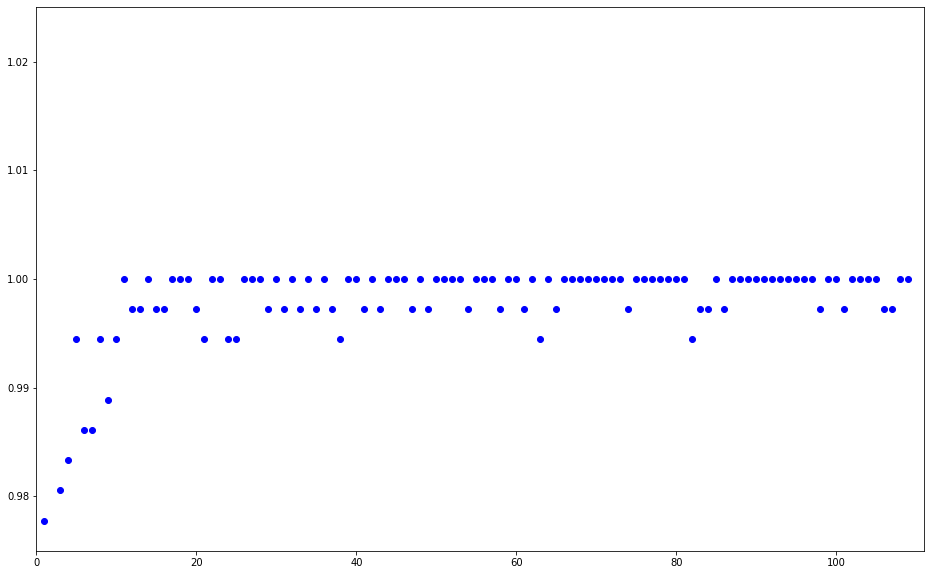

In [1115]:
i=1
plt.subplot(121)
plt.axis([0,111,0.975,1.025])
while i<110:
    mod_rf=RandomForestClassifier(n_estimators=i,max_depth=10)
    m_rf=model(mod_rf)
    p=st.mean(m_rf.k_acc(data_mel,label_mel,3,True))
    plt.plot(i,p,'bo')
    i=i+1

On peux choisir de prendre ici n_estimators = 90.

On va comparer les machines RandomForest et KNN sur cet exemple : 

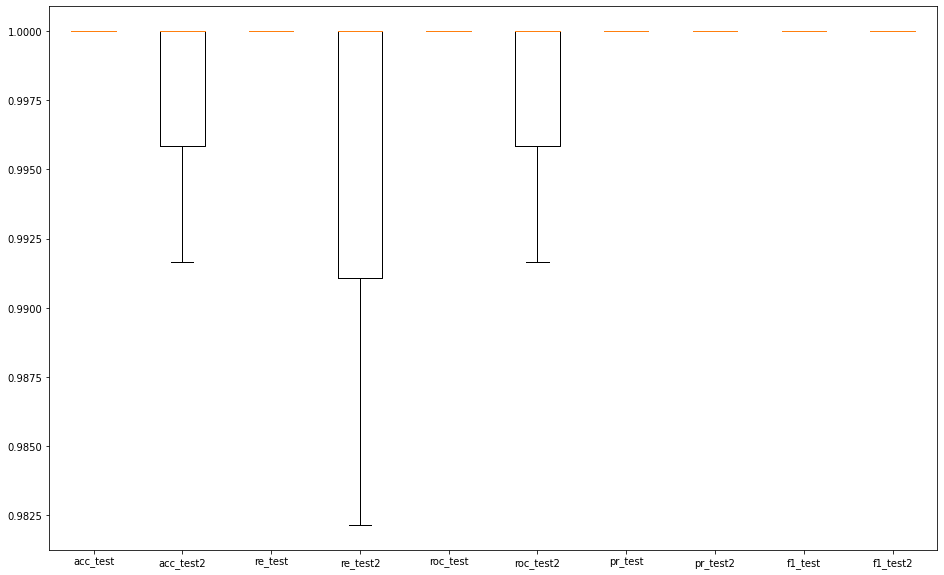

In [1140]:
mod_rf=RandomForestClassifier(n_estimators=90,max_depth=10)
m_rf=model(mod_rf)
m_knn_rf=model(mod_knn,model2=mod_rf)
m_knn_rf.k_comp(data_mel,label_mel,3,mel=True,re=True,f1=True,pr=True,roc=True, train=False)  

On remarque que bien que ces modeles sont presque identique en terme d'indicateurs bien que le modele des RandomForest soit ici legerement plus performant.  
Nous allons comparer les variances d'accuracy de KNN et du bagging des arbres aleatoire ( avec KNN accuracy = 1.1*10^(-6) )

In [1141]:
compte=0
acc=[]
while compte<100:
    acc.append(st.mean(m_rf.k_acc(data_mel,label_mel,3,True)))
    compte=compte+1
print("RandomForest Variance accuracy =" ,st.variance(acc))

RandomForest Variance accuracy = 1.4029180695847263e-06


Les modeles ont une variance comparable nous pouvons donc pour l'instant choisir le modele des RandomForest.

# Boosting ~ AdaBoost and GradientBoosting :

In [1144]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
?AdaBoostClassifier
mod_adb=AdaBoostClassifier(n_estimators=100)    #AdaBoost d'arbres
m_adb=model(mod_adb)

mod_gdb=GradientBoostingClassifier(n_estimators=100)    #GradientBoosting d'arbres
m_gdb=model(mod_gdb)

On dessine l'accuracy des deux modeles selon le nombres d'estimateur.

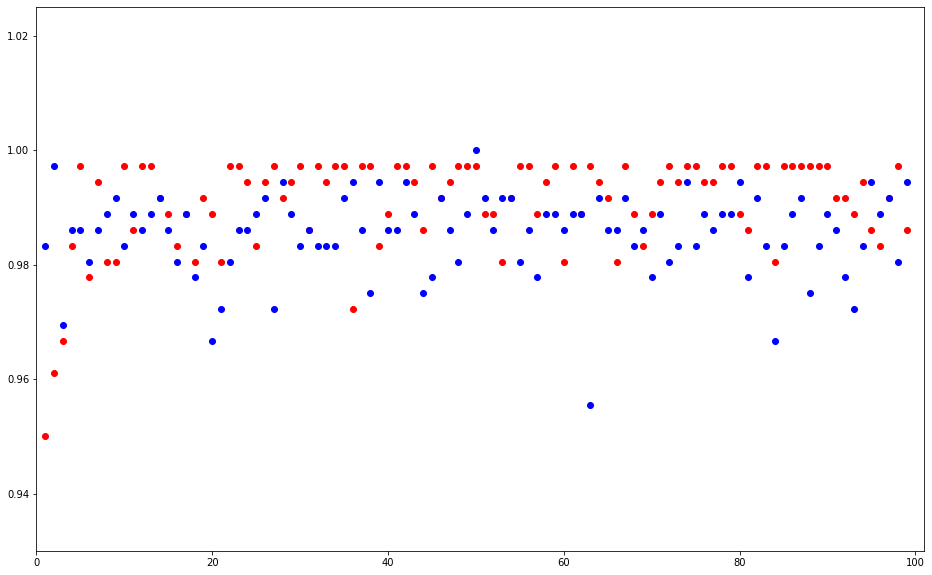

In [1157]:
i=1
plt.subplot(121)
plt.axis([0,101,0.93,1.025])
while i<100:
    mod_adb=AdaBoostClassifier(n_estimators=i)    
    m_adb=model(mod_adb)
    mod_gdb=GradientBoostingClassifier(n_estimators=i) 
    m_gdb=model(mod_gdb)
    plt.plot(i,st.mean(m_adb.k_acc(data_mel,label_mel,3,True)),'ro',c='r')
    plt.plot(i,st.mean(m_gdb.k_acc(data_mel,label_mel,3,True)),'ro',c='b')
    i=i+1

On remarque que l'accuracy est meilleure pour le modele AdaBoost, comparons ces deux modeles grace &ux autres indicateurs en prenant 85 arbres simples :

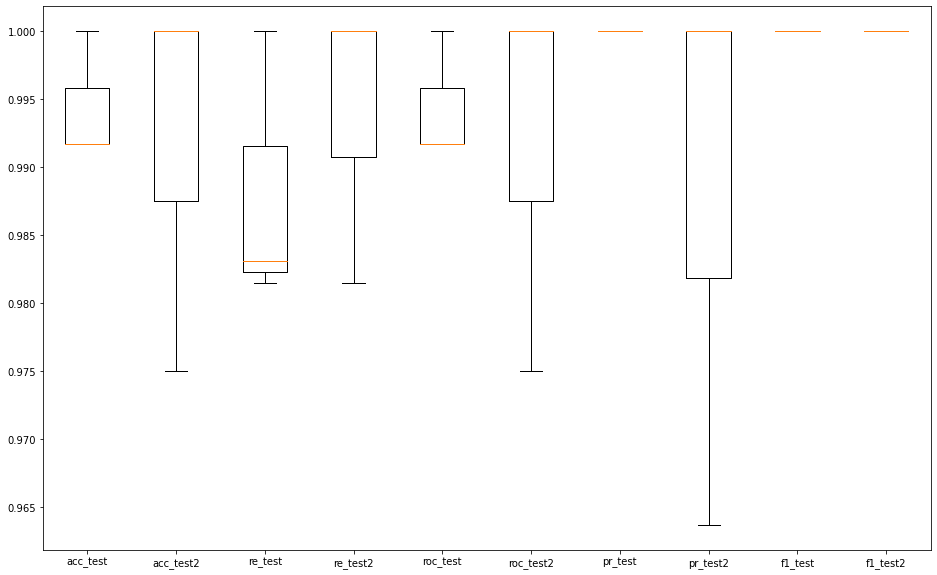

In [1161]:
mod_adb=AdaBoostClassifier(n_estimators=85)
mod_gdb=GradientBoostingClassifier(n_estimators=85)
m_adb_gdb=model(mod_adb,model2=mod_gdb)
m_adb_gdb.k_comp(data_mel,label_mel,3,mel=True,re=True,f1=True,pr=True,roc=True, train=False) 

Ces deux modeles se valent bien que AdaBoost soit plus performant sur l'accuracy qui nous interesse particulierement ici. Comparons le modele AdaBoost au modele issu des RandomForest :

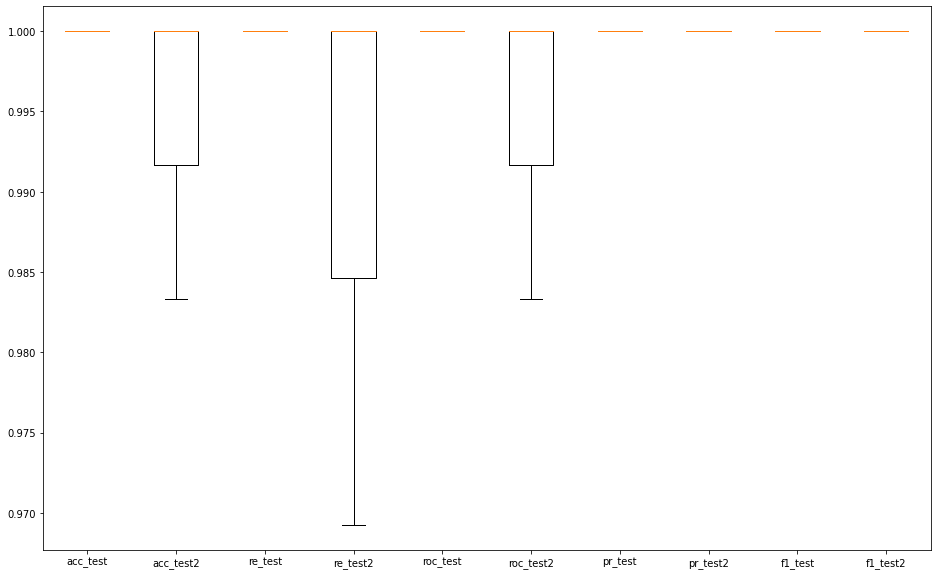

In [1162]:
mod_rf=RandomForestClassifier(n_estimators=90,max_depth=10)
mod_adb=AdaBoostClassifier(n_estimators=85)
m_rf_adb=model(mod_rf,model2=mod_adb)
m_rf_adb.k_comp(data_mel,label_mel,3,mel=True,re=True,f1=True,pr=True,roc=True, train=False)

Encore une fois ici c'est le modele contenant des RandomForest qui predit le mieux les chiffres 0 et 5.  

# Conclusion : 

Apres les diverses estimation, optimisation et comparaison nous sommes arrive a la conclusion que le model le plus adapte pour classer les chiffres 0 et 5 etait le modele qui se base sur les RandomForest.  
Nous avons choisit pour ce modele de generer 90 arbres primaire d'une profondeur d'un maximum de 10 feuilles chacun.  
En voici un petit resume :

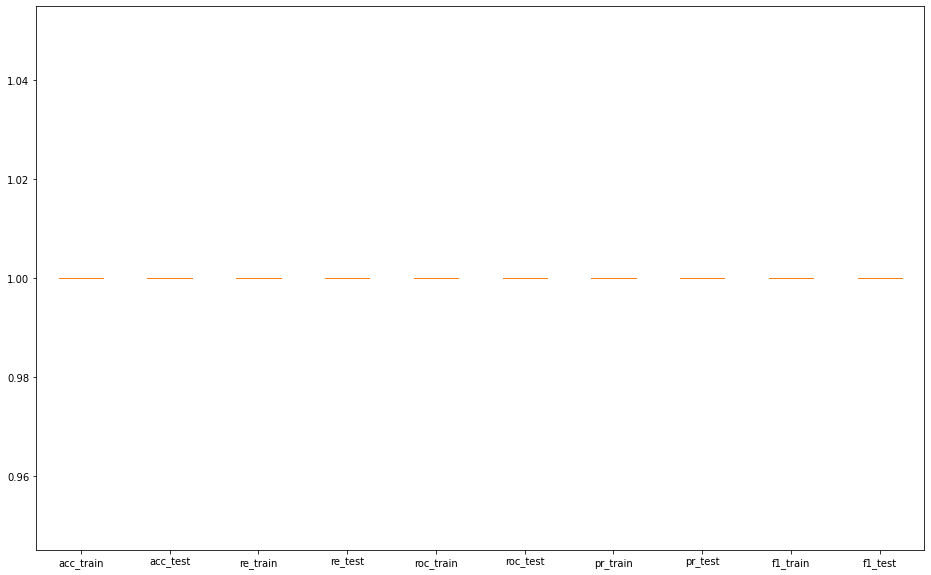

In [1179]:
mod_rf=RandomForestClassifier(n_estimators=90,max_depth=10)
m_rf=model(mod_rf)
m_rf.k_metrique(data_mel,label_mel,3,True)

Il faudrait maintenant le tester sur des images differentes pour voir si ses performances se maintiennent, voir si un tel modele est capable d'etre performant sur une classification avec plus de modalite par exemple ici passer des deux chiffres 0 et 5 au chiffres de 0 a 9 et enfin si il est capable de traiter des images avec beaucoup plus de pixels.   